#### TITLE
Working with Missing and Duplicate Data

##### OBJECTIVE
We will use the following workflow to clean our missing values:
1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.


##### DATA INTRODUCTION

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

happiness2015 = pd.read_csv('./dataset/wh_2015.csv')
happiness2016 = pd.read_csv('./dataset/wh_2016.csv')
happiness2017 = pd.read_csv('./dataset/wh_2017.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Cofirm the number of rows and columns for all the three datasets

In [2]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print('2015 -', shape_2015)
print('2016 -', shape_2016)
print('2017 -', shape_2017)

2015 - (164, 13)
2016 - (164, 14)
2017 - (164, 13)


##### IDENTIFYING MISSING VALUES
In pandas, missing values are generally represented by the NaN value, as seen in the dataframe above, or the None value.

However, it's good to note that pandas will not automatically identify values such as **n/a, -, or -- as NaN or None**, but they may also indicate data is missing. See [here](https://stackoverflow.com/questions/40011531/in-pandas-when-using-read-csv-how-to-assign-a-nan-to-a-value-thats-not-the#answer-40011736) for more information on how to use the pd.read_csv() function to read those values in as NaN.

**Identifying rows with missing values**

In [3]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


**Summary of missing values**

In [4]:
missing_2015 = happiness2015.isnull().sum()
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

The result is a series in which:
* The index contains the names of the columns in happiness2015.
* The corresponding value is the number of null values in each column.

Both *happiness2016*  and *happiness2017* also contain missing values in all columns except for Country and Year. It's good to check for missing values before transforming data to make sure we don't unintentionally introduce missing values.

If we do introduce missing values after transforming data, we'll have to determine if the data is really missing or if it's the result of some kind of error.

##### CORRECTING DATA CLEANING ERRORS THAT RESULT IN MISSING VALUES

In [5]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
print(combined.shape)
combined.head()

(492, 23)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

We can see above that our dataframe has many missing values and these missing values follow a pattern. Most columns fall into one of the following categories:
* 177 missing values (about 1/3 of the total values)
* 337 missing values (about 2/3 of the total values)


In [7]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

##### VISUALIZING MISSING DATA
We can learn more about where these missing values are located by visualizing them with a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html), a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

Note below that we first reset the index to be the YEAR column so that we'll be able to see the corresponding year on the left side of the heatmap:

<AxesSubplot:ylabel='YEAR'>

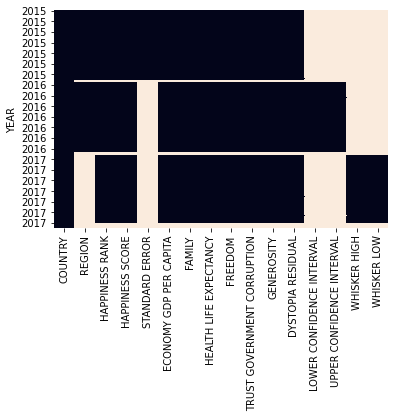

In [8]:
import seaborn as sns

combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

To understand this visualization, imagine we took combined, highlighted missing values in light gray and all other values in black, and then shrunk it so that we could easily view the entire dataframe at once.

Since we concatenated happiness2015, happiness2016, and happiness2017 by stacking them, note that the top third of the dataframe corresponds to the 2015 data, the second third corresponds to the 2016 data, and the bottom third corresponds to the 2017 data.

We can make the following observations:
* No values are missing in the COUNTRY column.
* There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
* Some columns only have data populated for one year.
* It looks like the REGION data is missing for the year 2017.


In [9]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']

missing = regions_2017.isnull().sum()
missing

164

##### USING DATA FROM ADDITIONAL SOURCES TO FILL IN MISSING VALUES

**Create a region dataframe with unique country rows along its corresponding region**

In [10]:
# Create a DF of regions, which has unique country with its corresponding region
regions = combined[['COUNTRY','REGION']]
regions = regions.drop_duplicates(['COUNTRY'])
regions = regions.dropna()
miss = regions.isnull().sum() 
print(miss)

# Count of unique countires in the combined DF
regions.shape
regions

COUNTRY    0
REGION     0
dtype: int64


,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [17]:
# combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
# combined 
filtered_df = combined.dropna(subset=['REGION_y'])
filtered_df  
# combined = combined.drop('REGION_x', axis = 1)
missing = filtered_df.isnull().sum()
missing.sort_values() 
missing 

COUNTRY                          0
HAPPINESS RANK                  14
HAPPINESS SCORE                 14
STANDARD ERROR                 316
ECONOMY GDP PER CAPITA          14
FAMILY                          14
HEALTH LIFE EXPECTANCY          14
FREEDOM                         14
TRUST GOVERNMENT CORRUPTION     14
GENEROSITY                      14
DYSTOPIA RESIDUAL               14
YEAR                             0
LOWER CONFIDENCE INTERVAL      323
UPPER CONFIDENCE INTERVAL      323
WHISKER HIGH                   323
WHISKER LOW                    323
REGION_y                         0
dtype: int64

##### Identifying Duplicate Values

In [25]:
#combined.rename(columns={"REGION_y": "REGION"}, errors="raise", inplace=True)
print(combined.columns)
combined 

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'STANDARD ERROR',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'REGION'],
      dtype='object')


,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [28]:
# combined['COUNTRY'] = combined['COUNTRY'].str.upper()
# combined['COUNTRY'] 
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


##### Correcting Duplicate Values

<div class="burk">IMP</div><i class="fa fa-lightbulb-o "></i>
It's also important to note that by default, the drop_duplicates() method will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows. 
Since the second duplicate row above contains more missing values than the first row, we'll keep the first row.

In [30]:
# combined['COUNTRY'] = combined['COUNTRY'].str.upper()
# combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])
combined[dups]

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION


Leaving missing values in the dataframe could cause issues with other transformation tasks and change the distribution of our data set

##### Handle Missing Values by Dropping Columns


In [34]:
combined.isnull().sum().sort_index()

COUNTRY                          0
DYSTOPIA RESIDUAL               12
ECONOMY GDP PER CAPITA          12
FAMILY                          12
FREEDOM                         12
GENEROSITY                      12
HAPPINESS RANK                  12
HAPPINESS SCORE                 12
HEALTH LIFE EXPECTANCY          12
LOWER CONFIDENCE INTERVAL      321
REGION                           0
STANDARD ERROR                 314
TRUST GOVERNMENT CORRUPTION     12
UPPER CONFIDENCE INTERVAL      321
WHISKER HIGH                   321
WHISKER LOW                    321
YEAR                             0
dtype: int64

We can see above that a couple columns contain over 300 missing values. Let's start by analyzing these columns since they account for most of the missing values left in the dataframe.

When deciding if you should drop a row or column, carefully consider whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:
* Is the missing data needed to accomplish our end goal?
* How will removing or replacing the missing values affect our analysis?

To answer the first question, let's establish our end goal:
* End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:
* STANDARD ERROR
* LOWER CONFIDENCE INTERVAL
* UPPER CONFIDENCE INTERVAL
* WHISKER HIGH
* WHISKER LOW


In [35]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
missing = combined.isnull().sum()
missing

COUNTRY                         0
HAPPINESS RANK                 12
HAPPINESS SCORE                12
ECONOMY GDP PER CAPITA         12
FAMILY                         12
HEALTH LIFE EXPECTANCY         12
FREEDOM                        12
TRUST GOVERNMENT CORRUPTION    12
GENEROSITY                     12
DYSTOPIA RESIDUAL              12
YEAR                            0
REGION                          0
dtype: int64

<div class="burk">IMP</div><i class="fa fa-lightbulb-o "></i>
However, as you start working with bigger datasets, it can sometimes be tedious to create a long list of column names to drop. Instead we can use the DataFrame.dropna() method to complete the same task.

By default, the dropna() method will drop rows with any missing values. To drop columns, we can set the axis parameter equal to 1, just like with the df.drop() method:

*df.dropna(axis=1)*
This would result in dropping columns with any missing values - we only want to drop certain columns. Instead, we can also use the thresh parameter to only drop columns if they contain below a certain number of non-null values.

So far, we've used the df.isnull() method to confirm the number of missing values in each column. To confirm the number of values that are NOT missing, we can use the DataFrame.notnull()method:

*combined.notnull().sum().sort_values()*

In [38]:
combined.notnull().sum().sort_values()

HAPPINESS RANK                 460
HAPPINESS SCORE                460
ECONOMY GDP PER CAPITA         460
FAMILY                         460
HEALTH LIFE EXPECTANCY         460
FREEDOM                        460
TRUST GOVERNMENT CORRUPTION    460
GENEROSITY                     460
DYSTOPIA RESIDUAL              460
COUNTRY                        472
YEAR                           472
REGION                         472
dtype: int64

In [37]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()

##### Analyzing Missing Data


To make a decision about how to handle the rest of the missing data, we'll analyze if it's better to just drop the rows or replace the missing values with other values.

Let's return to the following questions:

    Is the missing data needed to accomplish our end goal?
        Yes, we need the data to accomplish our goal of analyzing happiness scores and contributing factors by region and year.
    How will removing or replacing the missing values affect our analysis?

Let's break the second question down into a couple more specific questions:

    What percentage of the data is missing?
    Will dropping missing values cause us to lose valuable information in other columns?
    Can we identify any patterns in the missing data?

Question: What percentage of the data is missing?

As we saw when looking at the results of combined.isnull().sum() above, if missing values exist in a column of our dataframe, they account for about 4 percent of the total values (19 missing out of 489 values per column).

Generally speaking, the lower the percentage of missing values, the less likely dropping them will significantly impact the analysis.

Question: Will dropping missing values cause us to lose valuable information in other columns?

To answer this question, let's visualize the missing data once more. Note below that before we create the heatmap, we first set the index of combined to the REGION column and sort the values:


<AxesSubplot:ylabel='REGION'>

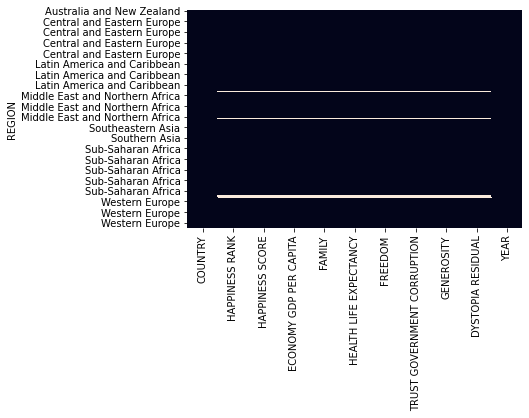

In [39]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

As a reminder, in the heatmap above, the missing values are represented with light gray and all other values with black. From this visualization, we can confirm that if the data is missing, it's missing in almost every column. We'll conclude that dropping the missing values won't cause us to lose valuable information in other columns.

Question: Can we identify any patterns in the missing data?

From the visualization above, we can also identify that only three regions contain missing values:

    Sub-Saharan Africa
    Middle East and Northern Africa
    Latin America and Carribbean

The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. Since we'd like to analyze the data according to region, we should also think about how these values impact the analysis for this region specifically.

##### Handling Missing Values with Imputation

    Only about 4 percent of the values in each column are missing.
    Dropping rows with missing values won't cause us to lose information in other columns.

As a result, it may be best to drop the remaining missing values.

However, before we make a decision, let's consider handling the missing values by replacing them with estimated values, also called imputation.

    Check for errors in data cleaning/transformation.
    Use data from additional sources to fill missing values.
    Drop row/column.
    Fill missing values with reasonable estimates computed from the available data.

There are many options for choosing the replacement value, including:

    A constant value
    The mean of the column
    The median of the column
    The mode of the column

For non-numeric columns, common replacement values include the most frequent value or a string like "Unknown" that is used to treat missing values as a separate category.

For numeric columns, it's very common to replace missing values with the mean. Since the rest of the columns in combined with missing data are all numeric, we'll explore this option next.

First, let's build some intuition around this technique by analyzing how replacing missing values with the mean affects the distribution of the data. In order to do so, we'll use the Series.fillna() method to replace the missing values with the mean.

Note that we must pass the replacement value into the Series.fillna() method. For example, if we wanted to replace all of the missing values in the HAPPINESS SCORE column with 0, we'd use the following syntax:

In [40]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.376243478932588
5.376243478932588


##### Dropping Rows
we confirmed that replacing missing values with the Series mean doesn't change the mean of the Series.

If we were to plot the distributions before and after replacing the missing values with the mean, we'd see that the shape of the distribution changes as more values cluster around the mean. Note that the mean is represented with the red and green lines in the plots below:
![title](./img/MissingVal_1.png)
![title](./img/MissingVal_2.png)

As we decide to use this approach, we should ask the following questions - are the missing happiness scores likely to be close to the mean? Or is it more likely that the scores are very high or very low? If the missing values lie at extremes, the mean won't be a good estimate for them.
![title](./img/MissingVal_3.png)

In [41]:
combined = combined.dropna()
missing = combined.isnull().sum()
missing

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

In [43]:
combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.057631
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.122209


As a reminder, the All row in the table above represents the mean happiness score for the whole world - the value that we used to replace our missing values. We can see that the world mean happiness score, 5.370728, is over 1 point higher than the mean happiness score for the Sub-Saharan Africa region, 4.150957.

Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.

As a result, we'll decide that of these two options, it's better to drop the rows with missing values.